In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib


In [2]:
profiles = pd.read_pickle("data/profiles.pickle")
races = pd.read_pickle("data/races.pickle")

In [3]:
print(profiles.shape,races.shape)

(1228, 35) (12019, 49)


In [4]:
display(profiles.describe())
display(profiles.columns)
display(profiles.head()) 

,current_rating,start_season_rating,season_stakes,total_stakes,age,no_123_starts_1,no_123_starts_2,no_123_starts_3,no_123_starts_4
count,1171.000000,1171.000000,1.228000e+03,1.228000e+03,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000
mean,61.461144,61.644748,3.385249e+05,1.729563e+06,4.590391,1.235342,1.211726,1.114821,12.743485
std,19.418050,18.439975,1.104372e+06,3.841287e+06,1.393595,1.788532,1.824168,1.724461,14.346629
min,10.000000,19.000000,0.000000e+00,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,52.000000,0.000000e+00,0.000000e+00,4.000000,0.000000,0.000000,0.000000,1.000000
50%,58.000000,57.000000,0.000000e+00,5.070500e+05,4.000000,0.000000,0.000000,0.000000,8.000000
75%,73.000000,73.000000,3.277500e+05,2.172860e+06,5.000000,2.000000,2.000000,2.000000,20.000000
max,137.000000,128.000000,2.094750e+07,6.068750e+07,10.000000,11.000000,13.000000,11.000000,80.000000


Index(['name', 'trainer', 'trainer_url', 'owner', 'owner_url',
       'current_rating', 'start_season_rating', 'sire', 'sire_url', 'dam',
       'dam_url', 'dam_sire', 'dam_sire_url', 'country_age', 'colour_sex',
       'import_type', 'season_stakes', 'total_stakes', 'no_123_starts',
       'no_start_past_10', 'stable_location', 'horse_id', 'name_name',
       'country', 'age', 'sex', 'colour_one', 'colour_two', 'no_123_starts_1',
       'no_123_starts_2', 'no_123_starts_3', 'no_123_starts_4',
       'stable_location_date', 'trainer_id', 'sire_id'],
      dtype='object')

,name,trainer,trainer_url,owner,owner_url,current_rating,start_season_rating,sire,sire_url,dam,...,sex,colour_one,colour_two,no_123_starts_1,no_123_starts_2,no_123_starts_3,no_123_starts_4,stable_location_date,trainer_id,sire_id
0,ALMABABY (V057),Y S Tsui,https://racing.hkjc.com/racing/information/Eng...,Ngai Wing Yin,https://racing.hkjc.com/racing/information/Eng...,90.0,86.0,Savabeel,https://racing.hkjc.com/racing/info/Horse/Same...,Ennerdale,...,Gelding,Bay,Brown,4,6,0,40,(27/07/2015),TYS,U2F2YWJlZWw=
1,ASSIMILATE (C160),K H Ting,https://racing.hkjc.com/racing/information/Eng...,Ian Cheng Ka Ho,https://racing.hkjc.com/racing/information/Eng...,82.0,82.0,Sebring,https://racing.hkjc.com/racing/info/Horse/Same...,Jester's Girl,...,Gelding,Chestnut,,0,0,0,0,(19/09/2018),TKH,U2VicmluZw==
2,ARDENODE (B145),W Y So,https://racing.hkjc.com/racing/information/Eng...,Frankie Ng Wai Hang & Ng Wai Hung,https://racing.hkjc.com/racing/information/Eng...,80.0,80.0,Hellvelyn,https://racing.hkjc.com/racing/info/Horse/Same...,Coconut Kisses,...,Gelding,Bay,,0,0,0,0,(12/10/2018),SWY,SGVsbHZlbHlu
3,AFRICAN SKY (C195),K H Ting,https://racing.hkjc.com/racing/information/Eng...,Tormenta Syndicate,https://racing.hkjc.com/racing/information/Eng...,76.0,76.0,Shamardal,https://racing.hkjc.com/racing/info/Horse/Same...,Angelita,...,Gelding,Bay,,0,0,0,0,(13/10/2018),TKH,U2hhbWFyZGFs
4,AMAZING CHOCOLATE (C059),R Gibson,https://racing.hkjc.com/racing/information/Eng...,Antony Ip Ren Haw,https://racing.hkjc.com/racing/information/Eng...,71.0,73.0,Sepoy,https://racing.hkjc.com/racing/info/Horse/Same...,Nanda Kot,...,Gelding,Bay,,0,0,0,2,,GR,U2Vwb3k=


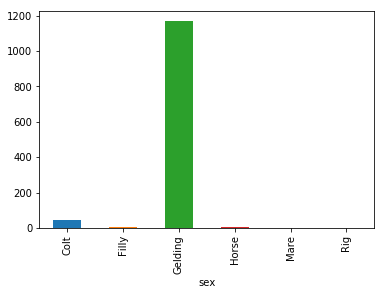

In [5]:
profiles.groupby("sex")["sex"].count().plot.bar()

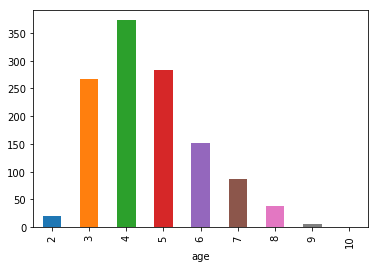

In [6]:
profiles.groupby("age")["age"].count().plot.bar()

In [7]:
def profile_features(prof):
    return (prof["no_123_starts_1"] + prof["no_123_starts_2"] + prof["no_123_starts_3"]) / prof["no_123_starts_4"]
    

profiles["place_ratio"] = profile_features(profiles)
#table sorted by most placed ratio
profiles[profiles["place_ratio"].isna() == False].sort_values("place_ratio", ascending=False)

,name,trainer,trainer_url,owner,owner_url,current_rating,start_season_rating,sire,sire_url,dam,...,colour_one,colour_two,no_123_starts_1,no_123_starts_2,no_123_starts_3,no_123_starts_4,stable_location_date,trainer_id,sire_id,place_ratio
762,NICCONI EXPRESS (C024),J Size,https://racing.hkjc.com/racing/information/Eng...,Larry Yung Chi Kin,https://racing.hkjc.com/racing/information/Eng...,73.0,72.0,Nicconi,https://racing.hkjc.com/racing/info/Horse/Same...,Rhandara,...,Bay,,0,1,1,2,,SJJ,TmljY29uaQ==,1.000000
952,SUPER MISSILE (B081),F C Lor,https://racing.hkjc.com/racing/information/Eng...,Happy Project Syndicate,https://racing.hkjc.com/racing/information/Eng...,71.0,71.0,Smart Missile,https://racing.hkjc.com/racing/info/Horse/Same...,Hula Here,...,Bay,,2,1,1,4,(18/08/2017),LFC,U21hcnQgTWlzc2lsZQ==,1.000000
44,BEAT THE CLOCK (V397),J Size,https://racing.hkjc.com/racing/information/Eng...,Merrick Chung Wai Lik,https://racing.hkjc.com/racing/information/Eng...,125.0,125.0,Hinchinbrook,https://racing.hkjc.com/racing/info/Horse/Same...,Flion Fenena,...,Bay,,6,6,5,17,(24/06/2016),SJJ,SGluY2hpbmJyb29r,1.000000
540,INVINCIBLE MISSILE (C037),W Y So,https://racing.hkjc.com/racing/information/Eng...,Law Cheuk & Shiu Leung Piu,https://racing.hkjc.com/racing/information/Eng...,62.0,52.0,Smart Missile,https://racing.hkjc.com/racing/info/Horse/Same...,Phaedra,...,Bay,,1,0,0,1,(16/07/2018),SWY,U21hcnQgTWlzc2lsZQ==,1.000000
632,LAKESHORE EAGLE (B391),W Y So,https://racing.hkjc.com/racing/information/Eng...,Danny Chiang Ping Fai,https://racing.hkjc.com/racing/information/Eng...,58.0,52.0,Master Of Design,https://racing.hkjc.com/racing/info/Horse/Same...,Rose Syrah,...,Brown,,1,0,0,1,(11/10/2018),SWY,TWFzdGVyIE9mIERlc2lnbg==,1.000000
919,SUPERICH (B257),F C Lor,https://racing.hkjc.com/racing/information/Eng...,Crown Glory Syndicate,https://racing.hkjc.com/racing/information/Eng...,89.0,74.0,Red Giant,https://racing.hkjc.com/racing/info/Horse/Same...,Daly Charm,...,Chestnut,,3,2,2,7,(17/11/2017),LFC,UmVkIEdpYW50,1.000000
1129,UGLY WARRIOR (B083),Y S Tsui,https://racing.hkjc.com/racing/information/Eng...,Just Fantastic Syndicate,https://racing.hkjc.com/racing/information/Eng...,94.0,87.0,Swiss Ace,https://racing.hkjc.com/racing/info/Horse/Same...,Ugly Betty,...,Chestnut,,5,1,1,7,(18/08/2017),TYS,U3dpc3MgQWNl,1.000000
920,SOLAR PATCH (B307),J Moore,https://racing.hkjc.com/racing/information/Eng...,Yeung Kin Man,https://racing.hkjc.com/racing/information/Eng...,88.0,88.0,Stratum,https://racing.hkjc.com/racing/info/Horse/Same...,Fleeting Touch,...,Chestnut,,2,2,1,5,,JM,U3RyYXR1bQ==,1.000000
939,SOUTHERN SUPERSTAR (B103),A T Millard,https://racing.hkjc.com/racing/information/Eng...,Edmond Yue Kwok Yin,https://racing.hkjc.com/racing/information/Eng...,74.0,73.0,Dynasty,https://racing.hkjc.com/racing/info/Horse/Same...,Sport's Chestnut,...,Bay,,0,0,1,1,(19/08/2017),MA,RHluYXN0eQ==,1.000000
1107,TORNADO TWIST (C028),J Size,https://racing.hkjc.com/racing/information/Eng...,Fok Yuk Tong,https://racing.hkjc.com/racing/information/Eng...,52.0,52.0,Denman,https://racing.hkjc.com/racing/info/Horse/Same...,More Glory,...,Brown,,0,0,1,1,(16/07/2018),SJJ,RGVubWFu,1.000000


In [8]:
profiles.sort_values("current_rating", ascending=False)

,name,trainer,trainer_url,owner,owner_url,current_rating,start_season_rating,sire,sire_url,dam,...,colour_one,colour_two,no_123_starts_1,no_123_starts_2,no_123_starts_3,no_123_starts_4,stable_location_date,trainer_id,sire_id,place_ratio
43,BEAUTY GENERATION (V380),J Moore,https://racing.hkjc.com/racing/information/Eng...,Patrick Kwok Ho Chuen,https://racing.hkjc.com/racing/information/Eng...,137.0,126.0,Road To Rock,https://racing.hkjc.com/racing/info/Horse/Same...,Stylish Bel,...,Bay,,11,1,3,19,(23/05/2016),JM,Um9hZCBUbyBSb2Nr,0.789474
669,MR STUNNING (V153),F C Lor,https://racing.hkjc.com/racing/information/Eng...,Maurice Koo Win Chong,https://racing.hkjc.com/racing/information/Eng...,128.0,128.0,Exceed And Excel,https://racing.hkjc.com/racing/info/Horse/Same...,With Fervour,...,Bay,,11,6,2,22,(25/09/2015),LFC,RXhjZWVkIEFuZCBFeGNlbA==,0.863636
204,D B PIN (V344),J Size,https://racing.hkjc.com/racing/information/Eng...,Samuel Wong Yin Shun,https://racing.hkjc.com/racing/information/Eng...,127.0,128.0,Darci Brahma,https://racing.hkjc.com/racing/info/Horse/Same...,Pins 'N' Needles,...,Bay,,6,6,2,16,(25/03/2016),SJJ,RGFyY2kgQnJhaG1h,0.875000
1067,TIME WARP (A066),A S Cruz,https://racing.hkjc.com/racing/information/Eng...,Martin Siu Kim Sun,https://racing.hkjc.com/racing/information/Eng...,127.0,127.0,Archipenko,https://racing.hkjc.com/racing/info/Horse/Same...,Here To Eternity,...,Chestnut,,6,2,4,22,(30/07/2016),CAS,QXJjaGlwZW5rbw==,0.545455
530,IVICTORY (A257),J Size,https://racing.hkjc.com/racing/information/Eng...,Michael T H Lee & Dr Henry Chan Hin Lee,https://racing.hkjc.com/racing/information/Eng...,126.0,128.0,Mossman,https://racing.hkjc.com/racing/info/Horse/Same...,Inca Lagoon,...,Bay,,7,1,0,12,(24/01/2017),SJJ,TW9zc21hbg==,0.666667
256,EXULTANT (B101),A S Cruz,https://racing.hkjc.com/racing/information/Eng...,Eddie Wong Ming Chak & Wong Leung Sau Hing,https://racing.hkjc.com/racing/information/Eng...,126.0,125.0,Teofilo,https://racing.hkjc.com/racing/info/Horse/Same...,Contrary,...,Bay,,4,5,1,14,(19/08/2017),CAS,VGVvZmlsbw==,0.714286
454,HOT KING PRAWN (A299),J Size,https://racing.hkjc.com/racing/information/eng...,Lau Sak Hong,https://racing.hkjc.com/racing/information/eng...,126.0,112.0,Denman,https://racing.hkjc.com/racing/info/Horse/Same...,De Chorus,...,Grey,,9,1,0,11,(20/02/2017),SJJ,RGVubWFu,0.909091
367,GLORIOUS FOREVER (B236),F C Lor,https://racing.hkjc.com/racing/information/Eng...,Michael Kwan Wing Lok,https://racing.hkjc.com/racing/information/Eng...,125.0,96.0,Archipenko,https://racing.hkjc.com/racing/info/Horse/Same...,Here To Eternity,...,Chestnut,,4,2,0,8,(11/11/2017),LFC,QXJjaGlwZW5rbw==,0.750000
44,BEAT THE CLOCK (V397),J Size,https://racing.hkjc.com/racing/information/Eng...,Merrick Chung Wai Lik,https://racing.hkjc.com/racing/information/Eng...,125.0,125.0,Hinchinbrook,https://racing.hkjc.com/racing/info/Horse/Same...,Flion Fenena,...,Bay,,6,6,5,17,(24/06/2016),SJJ,SGluY2hpbmJyb29r,1.000000
789,PAKISTAN STAR (V325),A S Cruz,https://racing.hkjc.com/racing/information/Eng...,Kerm Din,https://racing.hkjc.com/racing/information/Eng...,125.0,127.0,Shamardal,https://racing.hkjc.com/racing/info/Horse/Same...,Nina Celebre,...,Brown,,5,5,0,20,(19/03/2016),CAS,U2hhbWFyZGFs,0.500000


In [9]:
profiles.sort_values("season_stakes", ascending=False)

,name,trainer,trainer_url,owner,owner_url,current_rating,start_season_rating,sire,sire_url,dam,...,colour_one,colour_two,no_123_starts_1,no_123_starts_2,no_123_starts_3,no_123_starts_4,stable_location_date,trainer_id,sire_id,place_ratio
43,BEAUTY GENERATION (V380),J Moore,https://racing.hkjc.com/racing/information/Eng...,Patrick Kwok Ho Chuen,https://racing.hkjc.com/racing/information/Eng...,137.0,126.0,Road To Rock,https://racing.hkjc.com/racing/info/Horse/Same...,Stylish Bel,...,Bay,,11,1,3,19,(23/05/2016),JM,Um9hZCBUbyBSb2Nr,0.789474
367,GLORIOUS FOREVER (B236),F C Lor,https://racing.hkjc.com/racing/information/Eng...,Michael Kwan Wing Lok,https://racing.hkjc.com/racing/information/Eng...,125.0,96.0,Archipenko,https://racing.hkjc.com/racing/info/Horse/Same...,Here To Eternity,...,Chestnut,,4,2,0,8,(11/11/2017),LFC,QXJjaGlwZW5rbw==,0.750000
669,MR STUNNING (V153),F C Lor,https://racing.hkjc.com/racing/information/Eng...,Maurice Koo Win Chong,https://racing.hkjc.com/racing/information/Eng...,128.0,128.0,Exceed And Excel,https://racing.hkjc.com/racing/info/Horse/Same...,With Fervour,...,Bay,,11,6,2,22,(25/09/2015),LFC,RXhjZWVkIEFuZCBFeGNlbA==,0.863636
256,EXULTANT (B101),A S Cruz,https://racing.hkjc.com/racing/information/Eng...,Eddie Wong Ming Chak & Wong Leung Sau Hing,https://racing.hkjc.com/racing/information/Eng...,126.0,125.0,Teofilo,https://racing.hkjc.com/racing/info/Horse/Same...,Contrary,...,Bay,,4,5,1,14,(19/08/2017),CAS,VGVvZmlsbw==,0.714286
454,HOT KING PRAWN (A299),J Size,https://racing.hkjc.com/racing/information/eng...,Lau Sak Hong,https://racing.hkjc.com/racing/information/eng...,126.0,112.0,Denman,https://racing.hkjc.com/racing/info/Horse/Same...,De Chorus,...,Grey,,9,1,0,11,(20/02/2017),SJJ,RGVubWFu,0.909091
255,DEIRDRE (C811),M Hashida,https://racing.hkjc.com/racing/information/Eng...,Toji Morita,https://racing.hkjc.com/racing/information/Eng...,NaN,NaN,,,Reizend,...,Bay,,0,1,0,1,(23/11/2018),HM,NaN,1.000000
1162,VIVLOS (C809),Y Tomomichi,https://racing.hkjc.com/racing/information/Eng...,Kazuhiro Sasaki,https://racing.hkjc.com/racing/information/Eng...,NaN,NaN,,,Halwa Sweet,...,Black,,0,1,0,1,(23/11/2018),TY,NaN,1.000000
1067,TIME WARP (A066),A S Cruz,https://racing.hkjc.com/racing/information/Eng...,Martin Siu Kim Sun,https://racing.hkjc.com/racing/information/Eng...,127.0,127.0,Archipenko,https://racing.hkjc.com/racing/info/Horse/Same...,Here To Eternity,...,Chestnut,,6,2,4,22,(30/07/2016),CAS,QXJjaGlwZW5rbw==,0.545455
257,EAGLE WAY (A093),J Moore,https://racing.hkjc.com/racing/information/Eng...,Siu Pak Kwan,https://racing.hkjc.com/racing/information/Eng...,124.0,118.0,More Than Ready,https://racing.hkjc.com/racing/info/Horse/Same...,Wedgetail Eagle,...,Chestnut,,4,2,5,22,(29/08/2016),JM,TW9yZSBUaGFuIFJlYWR5,0.500000
204,D B PIN (V344),J Size,https://racing.hkjc.com/racing/information/Eng...,Samuel Wong Yin Shun,https://racing.hkjc.com/racing/information/Eng...,127.0,128.0,Darci Brahma,https://racing.hkjc.com/racing/info/Horse/Same...,Pins 'N' Needles,...,Bay,,6,6,2,16,(25/03/2016),SJJ,RGFyY2kgQnJhaG1h,0.875000


In [10]:
def rating_diff(prof):
    return prof.loc[:, "current_rating"] - prof.loc[:, "start_season_rating"]
    
profiles["rating_diff"] = rating_diff(profiles)

In [11]:

# Most improved rating horse
profiles.sort_values("rating_diff", ascending=False).head(25)

,name,trainer,trainer_url,owner,owner_url,current_rating,start_season_rating,sire,sire_url,dam,...,colour_two,no_123_starts_1,no_123_starts_2,no_123_starts_3,no_123_starts_4,stable_location_date,trainer_id,sire_id,place_ratio,rating_diff
367,GLORIOUS FOREVER (B236),F C Lor,https://racing.hkjc.com/racing/information/Eng...,Michael Kwan Wing Lok,https://racing.hkjc.com/racing/information/Eng...,125.0,96.0,Archipenko,https://racing.hkjc.com/racing/info/Horse/Same...,Here To Eternity,...,,4,2,0,8,(11/11/2017),LFC,QXJjaGlwZW5rbw==,0.750000,29.0
128,COUNTRY STAR (B396),J Size,https://racing.hkjc.com/racing/information/Eng...,HK Country Club Racing Syndicate,https://racing.hkjc.com/racing/information/Eng...,81.0,52.0,Starcraft,https://racing.hkjc.com/racing/info/Horse/Same...,Moonrush,...,,3,1,0,5,(07/12/2018),SJJ,U3RhcmNyYWZ0,0.800000,29.0
179,CLEMENT LEGEND (B137),C S Shum,https://racing.hkjc.com/racing/information/Eng...,"Clement Hui Ying Bun, Hui Yau Wing, Lau Sei Ke...",https://racing.hkjc.com/racing/information/Eng...,49.0,26.0,Ocean Park,https://racing.hkjc.com/racing/info/Horse/Same...,Spiriting,...,,3,1,0,14,(10/12/2018),SCS,T2NlYW4gUGFyaw==,0.285714,23.0
261,ELUSIVE STATE (A036),A T Millard,https://racing.hkjc.com/racing/information/Eng...,Eden Wong Chi Hong & Anita Chu Suk Ching,https://racing.hkjc.com/racing/information/Eng...,80.0,57.0,All American,https://racing.hkjc.com/racing/info/Horse/Same...,Jarada,...,,6,1,1,27,,MA,QWxsIEFtZXJpY2Fu,0.296296,23.0
611,LITTLE GIANT (V342),D J Hall,https://racing.hkjc.com/racing/information/Eng...,Wizard Syndicate,https://racing.hkjc.com/racing/information/Eng...,115.0,93.0,Swiss Ace,https://racing.hkjc.com/racing/info/Horse/Same...,Princess Carolina,...,,3,0,2,6,,HAD,U3dpc3MgQWNl,0.833333,22.0
522,HOLY UNICORN (V179),K H Ting,https://racing.hkjc.com/racing/information/eng...,Leung Kai Fai,https://racing.hkjc.com/racing/information/eng...,41.0,19.0,Holy Roman Emperor,https://racing.hkjc.com/racing/info/Horse/Same...,Open Book,...,,3,2,2,31,(26/09/2015),TKH,SG9seSBSb21hbiBFbXBlcm9y,0.225806,22.0
480,HAPPY TOUR (B374),C S Shum,https://racing.hkjc.com/racing/information/eng...,Jackie Wong See Sum,https://racing.hkjc.com/racing/information/eng...,72.0,52.0,Snitzel,https://racing.hkjc.com/racing/info/Horse/Same...,Good Weekend,...,,2,0,1,4,(17/03/2018),SCS,U25pdHplbA==,0.750000,20.0
70,BLITZING (B290),A S Cruz,https://racing.hkjc.com/racing/information/Eng...,Tung Kit Syndicate,https://racing.hkjc.com/racing/information/Eng...,66.0,48.0,Jimmy Choux,https://racing.hkjc.com/racing/info/Horse/Same...,Fast Fame,...,,2,2,1,8,(22/12/2017),CAS,SmltbXkgQ2hvdXg=,0.625000,18.0
923,STYLING CITY (B280),J Moore,https://racing.hkjc.com/racing/information/Eng...,Gary Ling Kay Wai & Ling Chiu Shing,https://racing.hkjc.com/racing/information/Eng...,86.0,68.0,Starspangledbanner,https://racing.hkjc.com/racing/info/Horse/Same...,Secret Liaison,...,,4,0,1,6,(19/12/2017),JM,U3RhcnNwYW5nbGVkYmFubmVy,0.833333,18.0
857,RED WARRIOR (B355),J Size,https://racing.hkjc.com/racing/information/Eng...,The Hon Ronald Arculli GBM GBS JP & Johanna K ...,https://racing.hkjc.com/racing/information/Eng...,89.0,71.0,Holy Roman Emperor,https://racing.hkjc.com/racing/info/Horse/Same...,Sweet Dreams Baby,...,,2,1,1,5,(07/12/2018),SJJ,SG9seSBSb21hbiBFbXBlcm9y,0.800000,18.0


In [12]:

# mean current rating grouped by sire
profiles.groupby("sire")["current_rating"].agg(["count", "mean"]).sort_values("mean", ascending=False).head(20)

,count,mean
sire,,
Philanthropist,1,118.000000
Nom Du Jeu,1,117.000000
My Risk,1,115.000000
Archipenko,3,110.666667
Giant's Causeway,1,108.000000
Count Dubois,1,108.000000
Stronghold,1,106.000000
Lilbourne Lad,1,103.000000
Rajj,1,102.000000


In [13]:
profiles.groupby("trainer").mean().sort_values("no_123_starts_4", ascending=False).head(25)

,current_rating,start_season_rating,season_stakes,total_stakes,age,no_123_starts_1,no_123_starts_2,no_123_starts_3,no_123_starts_4,place_ratio,rating_diff
trainer,,,,,,,,,,,
D E Ferraris,56.955556,58.755556,260591.086957,1.884488e+06,5.413043,1.608696,2.173913,2.260870,23.130435,0.218946,-1.800000
K L Man,53.491228,54.333333,225293.508772,1.490826e+06,5.070175,1.350877,1.403509,1.508772,18.245614,0.199081,-0.842105
C W Chang,52.255814,55.209302,125845.744681,1.177081e+06,4.787234,1.127660,1.510638,1.148936,15.872340,0.165134,-2.953488
L Ho,55.581818,56.927273,182447.090909,1.247028e+06,4.945455,1.163636,1.163636,1.036364,15.200000,0.176426,-1.345455
A S Cruz,76.215385,75.261538,692140.769231,4.256012e+06,4.492308,1.800000,1.600000,1.138462,14.676923,0.285028,0.953846
C H Yip,56.545455,57.378788,198846.641791,1.331755e+06,4.716418,1.298507,1.164179,1.208955,14.597015,0.227642,-0.833333
Y S Tsui,60.661017,61.169492,300757.540984,1.534765e+06,4.836066,1.344262,1.327869,1.114754,14.344262,0.204852,-0.508475
R Gibson,59.937500,60.250000,311780.104167,1.769647e+06,4.750000,1.229167,1.395833,1.208333,14.229167,0.237846,-0.312500
P O'Sullivan,57.588235,58.784314,109089.615385,1.325892e+06,4.730769,1.307692,1.326923,1.288462,13.769231,0.225917,-1.196078


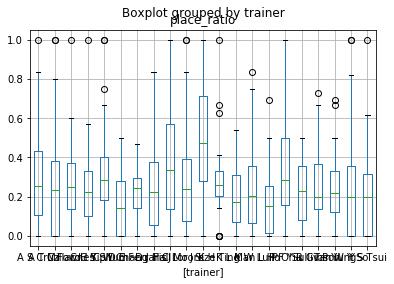

In [14]:
#box plot of trainers and their place ratio

#display(profiles["trainer"].isin(profiles.groupby("trainer").count()["name"].sort_values(ascending=False)[:21].index))
profiles.loc[profiles["trainer"].isin(profiles.groupby("trainer").count()["name"].sort_values(ascending=False)[:21].index) ,["place_ratio", "trainer"]].boxplot(by="trainer")

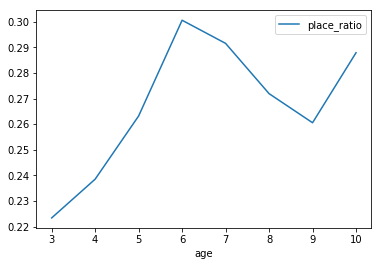

In [15]:
#mature horses has higher place ratio. 

display(profiles.groupby("age").mean()[[ "place_ratio"]].plot())


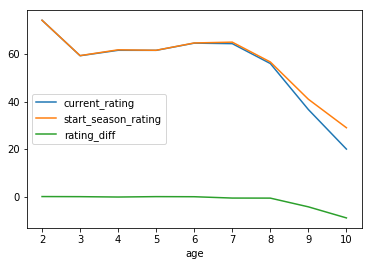

In [16]:
#older horses  past age 8 start to lose rating

display(profiles.groupby("age").mean()[[ "current_rating", "start_season_rating","rating_diff"]].plot())


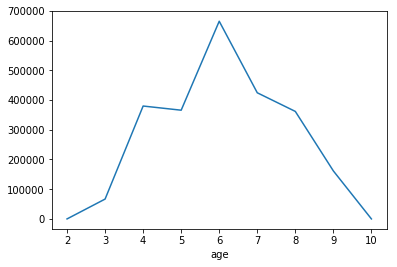

In [17]:
display(profiles.groupby("age").mean()["season_stakes"].plot())

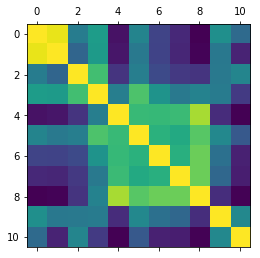

In [18]:
display(plt.matshow(profiles.corr()))

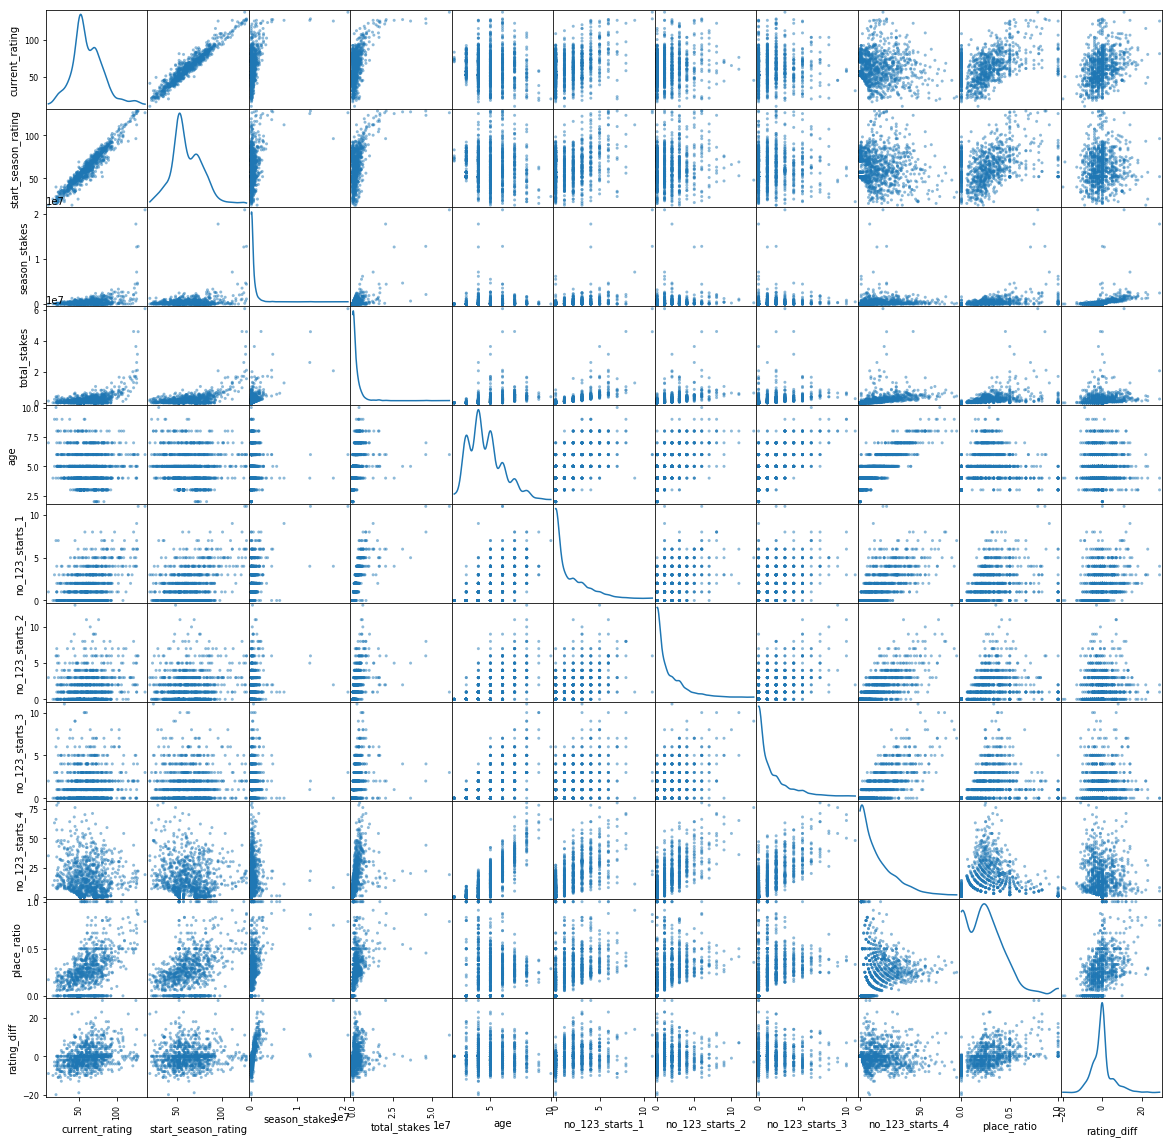

In [19]:
pd.plotting.scatter_matrix(profiles, diagonal="kde", figsize=(20,20));

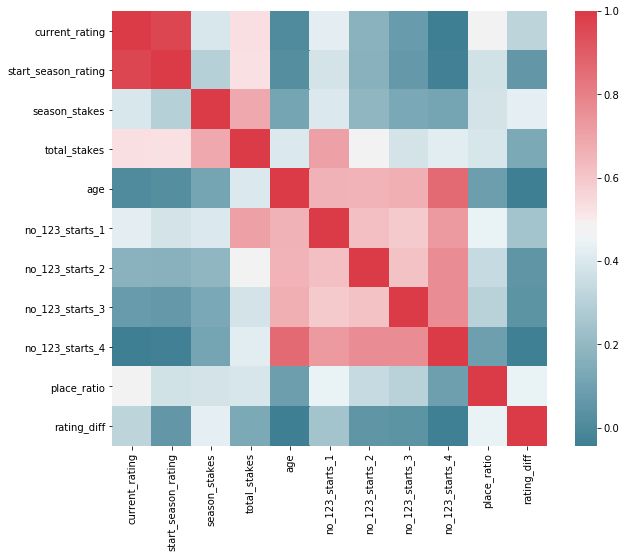

In [20]:

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(profiles.corr(), mask=np.zeros_like(profiles.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [21]:
races.iloc[:10, 8:30]

,dr,rtg,trainer,trainer_url,jockey,jockey_url,lbw,win_odds,act_wt,running_position,...,gear,horse_id,race_course,race_course_2,race_course_3,running_position_1,running_position_2,running_position_3,running_position_4,finish_time_micro_sec
0,7,73,R Gibson,https://racing.hkjc.com/racing/information/Eng...,C Schofield,https://racing.hkjc.com/racing/information/Eng...,7.00,79.0,128,12 10 11 12,...,--,C059,ST,Turf,"""A""",12,10,11,12,8345.0
1,4,73,R Gibson,https://racing.hkjc.com/racing/information/Eng...,C Schofield,https://racing.hkjc.com/racing/information/Eng...,3.00,33.0,126,11 11 7,...,--,C059,HV,Turf,"""A""",11,11,7,0,5805.0
2,4,70,C S Shum,https://racing.hkjc.com/racing/information/Eng...,C Schofield,https://racing.hkjc.com/racing/information/Eng...,3.00,9.9,125,8 9 6,...,TT,B056,ST,Turf,"""C""",8,9,6,0,6981.0
3,4,72,C S Shum,https://racing.hkjc.com/racing/information/Eng...,Z Purton,https://racing.hkjc.com/racing/information/Eng...,5.00,4.6,120,6 6 6 8,...,TT,B056,HV,Turf,"""C""",6,6,6,8,10148.0
4,4,72,C S Shum,https://racing.hkjc.com/racing/information/Eng...,J Moreira,https://racing.hkjc.com/racing/information/Eng...,2.00,2.5,125,6 6 2,...,TT,B056,ST,Turf,"""B""",6,6,2,0,7019.0
5,2,72,C S Shum,https://racing.hkjc.com/racing/information/Eng...,A Badel,https://racing.hkjc.com/racing/information/Eng...,1.00,3.6,125,8 10 3,...,TT,B056,ST,Turf,"""B+2""",8,10,3,0,6953.0
6,12,72,C S Shum,https://racing.hkjc.com/racing/information/Eng...,A Badel,https://racing.hkjc.com/racing/information/Eng...,4.00,18.0,125,5 1 2 5,...,TT,B056,ST,Turf,"""A""",5,1,2,5,8245.0
7,8,70,C S Shum,https://racing.hkjc.com/racing/information/Eng...,A Badel,https://racing.hkjc.com/racing/information/Eng...,0.75,19.0,126,10 10 2,...,TT1,B056,HV,Turf,"""C+3""",10,10,2,0,7014.0
8,3,71,P F Yiu,https://racing.hkjc.com/racing/information/Eng...,K Teetan,https://racing.hkjc.com/racing/information/Eng...,6.00,3.7,125,3 4 6 12,...,B,A354,ST,Turf,"""C+3""",3,4,6,12,8375.0
9,3,71,P F Yiu,https://racing.hkjc.com/racing/information/Eng...,K Teetan,https://racing.hkjc.com/racing/information/Eng...,1.00,4.1,124,4 5 4,...,B,A354,HV,Turf,"""C+3""",4,5,4,0,6995.0


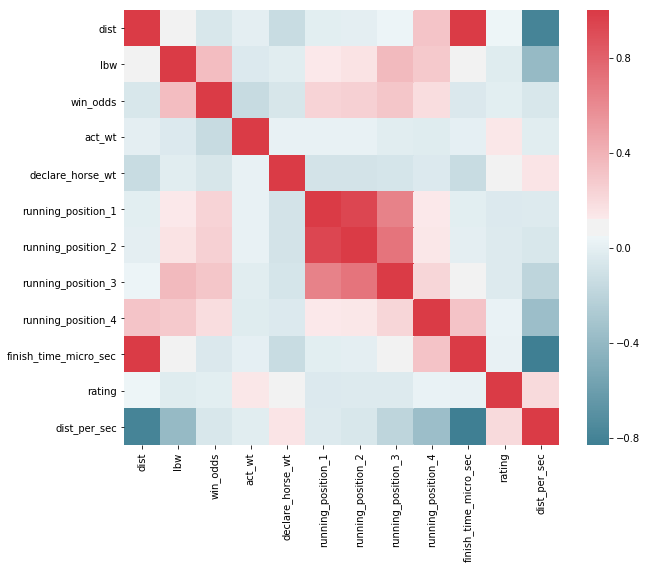

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(races.corr(), mask=np.zeros_like(races.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

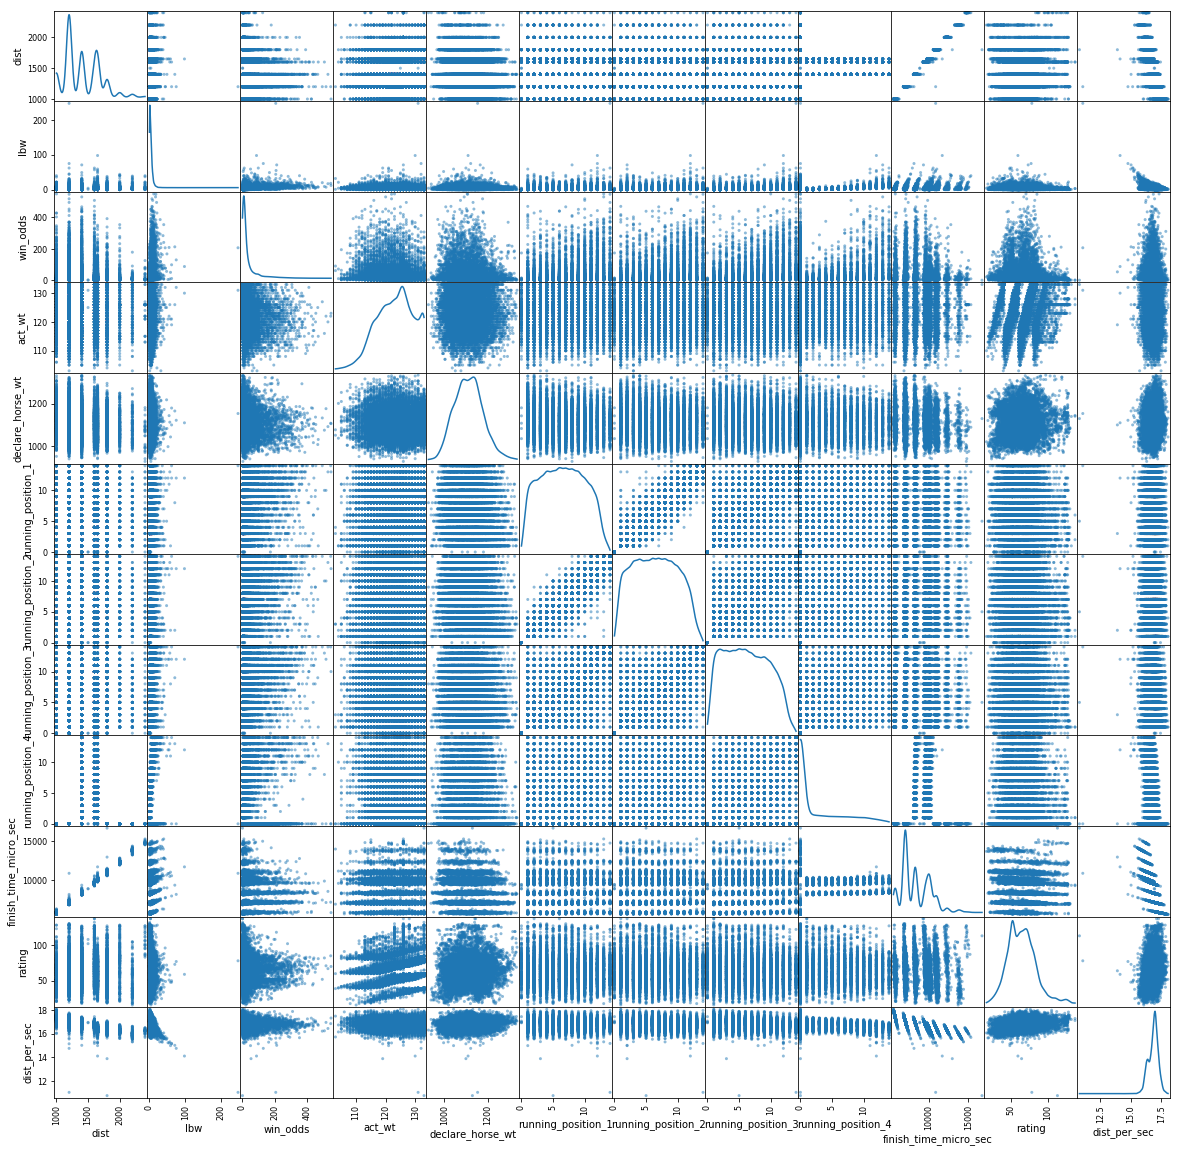

In [23]:
pd.plotting.scatter_matrix(races, diagonal="kde", figsize=(20,20));

In [24]:
races.columns

Index(['race_index', 'race_index_url', 'pla', 'date', 'rc_track_course',
       'dist', 'g', 'race_class', 'dr', 'rtg', 'trainer', 'trainer_url',
       'jockey', 'jockey_url', 'lbw', 'win_odds', 'act_wt', 'running_position',
       'finish_time', 'declare_horse_wt', 'gear', 'horse_id', 'race_course',
       'race_course_2', 'race_course_3', 'running_position_1',
       'running_position_2', 'running_position_3', 'running_position_4',
       'finish_time_micro_sec', 'rating', 'gear_Blinkers',
       'gear_Blinkers_Cowl', 'gear_Cornell_Collar', 'gear_Crossed_Nose_Band',
       'gear_Ear_Plugs', 'gear_Hood', 'gear_Pacifier',
       'gear_Pacifer_with_one_Cowl', 'gear_Pacifier_with_Cowls',
       'gear_Shadow_Roll', 'gear_Sheepskin_Browband',
       'gear_Sheepskn_Cheek_Pieces', 'gear_Sheepskin_Cheek_Piece_One_Side',
       'gear_Tongue_Tie', 'gear_Visor', 'dist_per_sec', 'jockey_id',
       'trainer_id'],
      dtype='object')

In [25]:
races.loc[:, "pla"].unique()

array(['12', '07', '06', '08', '02', '03', '05', '04', '01', '09', '11',
       '14', '10', '13', 'WV', 'WV-A', 'WX-A', 'UR', 'WX', 'DISQ', 'FE'],
      dtype=object)

In [26]:
places_dict = {"DISQ": "Disqualified",
               "DNF": "Did not Finish",
               "FE": "Horse fell in the race",
               "PU": "Pulled Up",
               "TNP": "Took no part",
               "UR": "Unseated Rider",
               "VOID": "Void Race", 
               "WR": "Withdrawn - by Starters",
               "WV": "Withdrawn-on Veterinary Ground",
               "WV-A": "Withdrawn-on Vet Grounds + R fee",
               "WX": "Withdrawn-by order of Stewards",
               "WX-A": "withdrawn-by Stewards + R fee"
              }


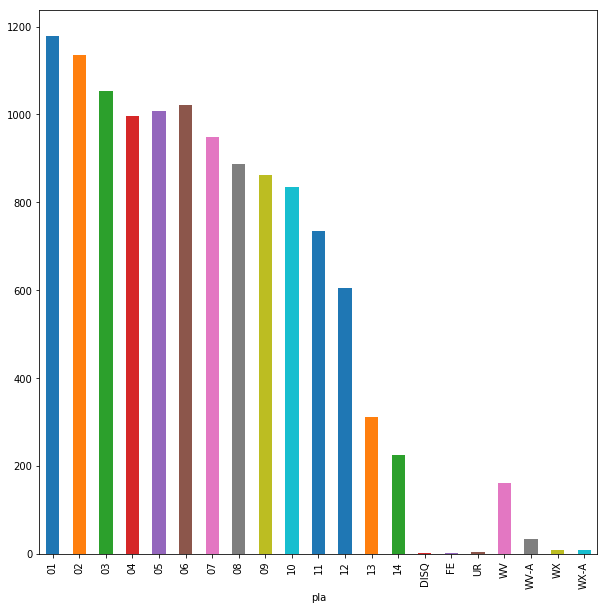

In [27]:
races.groupby("pla")['pla'].count().plot.bar(figsize=(10,10))

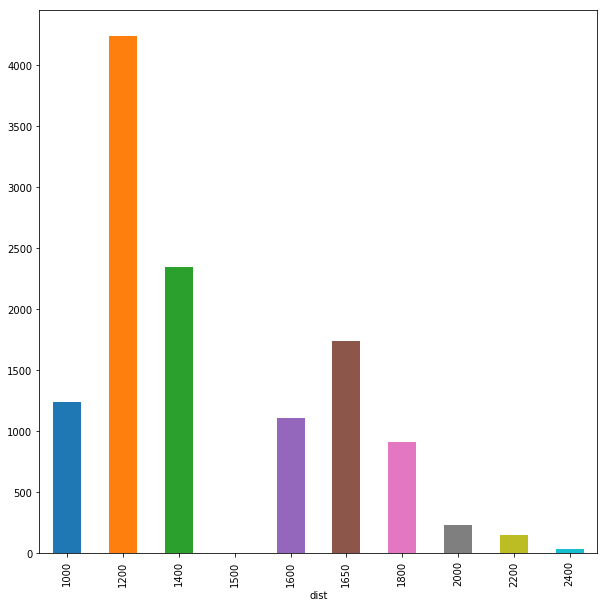

In [28]:
races.groupby("dist")["dist"].count().plot.bar(figsize=(10,10))

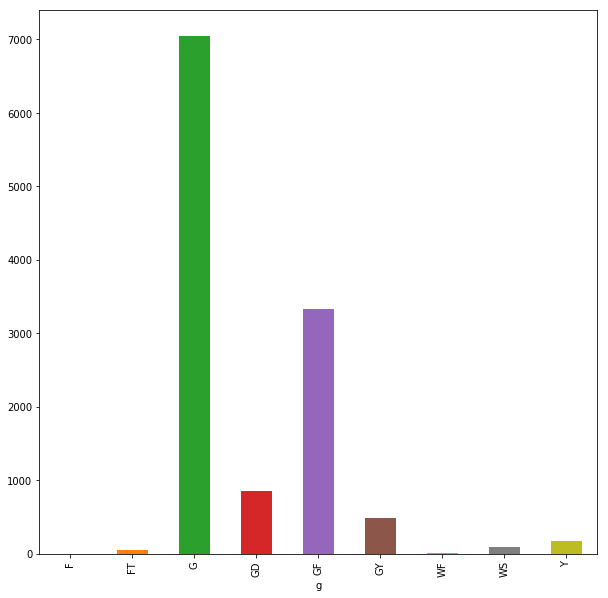

In [29]:
races.groupby("g")["g"].count().plot.bar(figsize=(10,10))

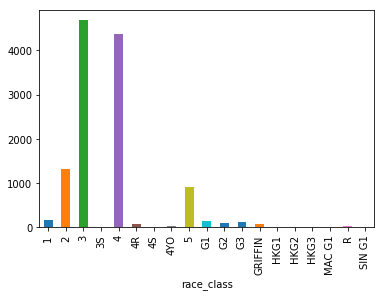

In [30]:
races.groupby("race_class")["race_class"].count().plot.bar()

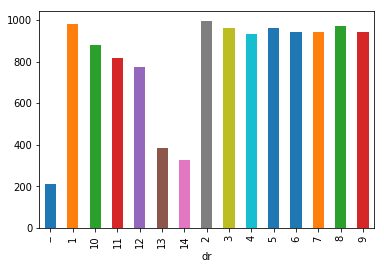

In [31]:
races.groupby("dr")["dr"].count().plot.bar()

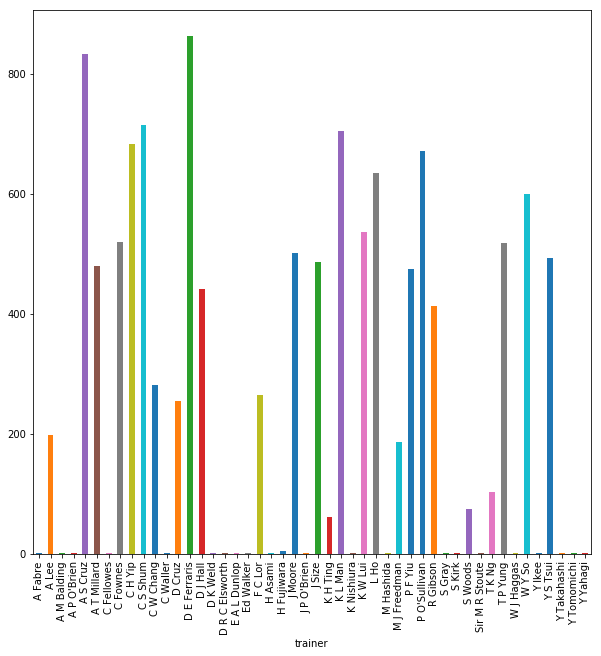

In [32]:
races.groupby("trainer")["trainer"].count().plot.bar(figsize=(10,10))

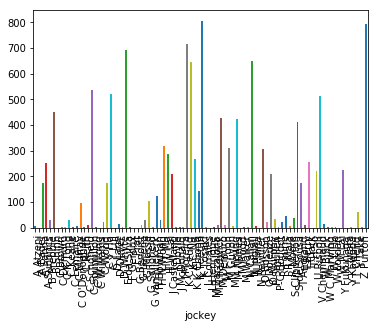

In [33]:
races.groupby("jockey")["jockey"].count().plot.bar()





In [34]:
#f, ax = plt.subplots(figsize=(10, 8))



In [35]:
(races.loc[:, "dist"] / races.loc[:, "finish_time_micro_sec"])*100

0        16.776513
1        17.226529
2        17.189514
3        16.259361
4        17.096452
5        17.258737
6        16.979988
7        17.108640
8        16.716418
9        17.155111
10       17.052721
11       17.391304
12       17.860332
13       17.485574
14       17.052721
15       17.157564
16       16.891892
17       16.865438
18       16.979988
19       17.348562
20       17.642908
21       16.963528
22       17.182131
23       16.861375
24       16.889514
25       16.977929
26       17.101325
27       17.108640
28       17.276130
29       17.194440
           ...    
11989    16.307571
11990    16.478989
11991    16.826165
11992    16.898008
11993    16.746411
11994    16.626832
11995    16.635475
11996    16.758439
11997    17.172295
11998    17.011625
11999    17.209236
12000    17.091582
12001    16.896649
12002    17.256255
12003    17.152659
12004    17.162471
12005    16.956337
12006    16.925247
12007    17.458101
12008    17.286085
12009    16.994760
12010    17.

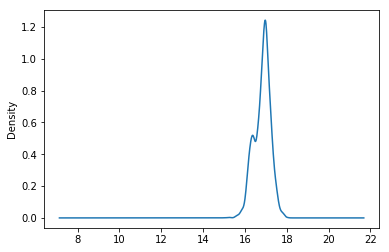

In [36]:
races.loc[:, "dist_per_sec"].plot.kde()

In [37]:
races.groupby("trainer")["pla"].agg(lambda x: list(x).count("01"))

trainer
A Fabre             0
A Lee               9
A M Balding         0
A P O'Brien         0
A S Cruz          104
A T Millard        61
C Fellowes          0
C Fownes           53
C H Yip            61
C S Shum           73
C W Chang          16
C Waller            0
D Cruz             15
D E Ferraris       53
D J Hall           45
D K Weld            0
D R C Elsworth      0
E A L Dunlop        0
Ed Walker           0
F C Lor            39
H Asami             0
H Fujiwara          0
J Moore            57
J P O'Brien         0
J Size            117
K H Ting           14
K L Man            52
K Nishiura          0
K W Lui            52
L Ho               59
M Hashida           0
M J Freedman       14
P F Yiu            45
P O'Sullivan       51
R Gibson           43
S Gray              0
S Kirk              0
S Woods             4
Sir M R Stoute      0
T K Ng              8
T P Yung           46
W J Haggas          0
W Y So             43
Y Ikee              0
Y S Tsui           45
Y 

In [38]:
races.columns

Index(['race_index', 'race_index_url', 'pla', 'date', 'rc_track_course',
       'dist', 'g', 'race_class', 'dr', 'rtg', 'trainer', 'trainer_url',
       'jockey', 'jockey_url', 'lbw', 'win_odds', 'act_wt', 'running_position',
       'finish_time', 'declare_horse_wt', 'gear', 'horse_id', 'race_course',
       'race_course_2', 'race_course_3', 'running_position_1',
       'running_position_2', 'running_position_3', 'running_position_4',
       'finish_time_micro_sec', 'rating', 'gear_Blinkers',
       'gear_Blinkers_Cowl', 'gear_Cornell_Collar', 'gear_Crossed_Nose_Band',
       'gear_Ear_Plugs', 'gear_Hood', 'gear_Pacifier',
       'gear_Pacifer_with_one_Cowl', 'gear_Pacifier_with_Cowls',
       'gear_Shadow_Roll', 'gear_Sheepskin_Browband',
       'gear_Sheepskn_Cheek_Pieces', 'gear_Sheepskin_Cheek_Piece_One_Side',
       'gear_Tongue_Tie', 'gear_Visor', 'dist_per_sec', 'jockey_id',
       'trainer_id'],
      dtype='object')

In [39]:

# Does horse has speed or stemina
races.groupby(["horse_id", "dist"])["pla"].value_counts().unstack(fill_value=0)

pla            01  02  03  04  05  06  07  08  09  10  ...   12  13  14  DISQ  \
horse_id dist                                          ...                      
A001     1200   0   2   1   0   0   4   1   0   3   0  ...    0   0   0     0   
A005     1200   0   0   0   0   0   0   1   0   0   0  ...    0   0   0     0   
         1400   1   2   1   1   1   0   1   0   1   0  ...    0   1   0     0   
         1600   1   1   1   1   1   2   0   1   1   0  ...    1   1   0     0   
         1650   0   0   0   0   0   0   0   0   1   0  ...    0   0   0     0   
         1800   0   1   1   0   0   0   1   0   0   0  ...    0   0   1     0   
A006     1200   2   1   3   0   1   2   1   1   0   1  ...    0   0   0     0   
         1400   0   0   1   0   0   1   0   0   2   0  ...    0   0   0     0   
         1650   0   0   0   0   0   0   0   0   0   1  ...    0   0   0     0   
A008     1000   2   8   3   2   3   1   4   3   0   2  ...    0   0   0     0   
         1200   1   0   4   1   0   1   1   1   0   0  ...    0   0   0     0   
         1400   0   1   0   0   0   0   0   0   1   0  ...    0   0   0     0   
A009     1000   0   0   2   0   0   0   0   0   0   0  ...    0   0   0     0   
         1200   4   4   1   4   0   1   0   0   1   0  ...    1   0   0     0   
         1400   0   0   0   0   0   0   2   1   1   0  ...    0   0   0     0   
A010     1200   1   2   3   1   1   1   1   0   0   0  ...    0   0   0     0   
         1400   2   0   1   0   1   0   1   1   0   2  ...    0   0   0     0   
         1600   0   0   0   0   0   0   0   0   0   0  ...    0   0   0     0   
         1650   0   0   0   0   0   0   0   1   0   0  ...    0   0   0     0   
A012     1000   0   0   1   0   1   0   0   0   0   0  ...    0   0   0     0   
         1200   1   0   1   0   1   0   1   1   0   2  ...    0   0   0     0   
         1400   0   0   2   1   0   1   0   0   1   0  ...    1   0   0     0   
         1600   0   1   0   1   1   0   0   0   0   0  ...    0   0   0     0   
         1650   1   0   0   1   0   1   0   1   1   0  ...    0   0   0     0   
         1800   0   0   0   0   0   0   1   0   0   0  ...    0   0   0     0   
A017     1000   0   0   0   0   0   1   0   0   1   0  ...    0   0   0     0   
         1200   0   0   0   0   0   0   0   1   2   0  ...    0   0   0     0   
         1650   4   2   1   0   0   0   0   0   0   1  ...    0   0   0     0   
A021     1000   1   0   0   0   1   0   0   0   0   0  ...    0   0   0     0   
         1200   0   2   1   1   0   1   2   0   1   0  ...    2   0   0     0   
...            ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ..  ..  ..   ...   
V408     2200   0   0   0   0   1   1   0   1   0   0  ...    0   0   0     0   
V409     1000   1   0   0   0   0   0   0   0   0   0  ...    0   0   1     0   
         1200   1   0   1   0   0   1   0   0   0   0  ...    1   0   1     0   
         1400   0   0   0   0   0   0   0   0   0   0  ...    0   0   2     0   
         1600   0   0   0   0   0   0   0   0   1   0  ...    0   0   0     0   
         1650   0   0   0   0   1   0   0   1   0   3  ...    0   0   0     0   
V410     1200   1   0   0   0   0   0   0   1   0   0  ...    0   0   0     0   
         1400   2   1   0   0   0   0   1   0   0   0  ...    0   0   0     0   
         1600   3   1   0   1   1   1   2   1   0   0  ...    0   0   0     0   
         1800   0   0   1   0   0   0   0   0   0   0  ...    0   0   0     0   
         2000   0   0   1   1   0   0   1   0   0   0  ...    0   0   0     0   
V411     1200   0   0   0   0   0   0   0   0   0   0  ...    0   0   0     0   
         1400   0   0   0   0   0   1   0   0   0   0  ...    1   0   2     0   
         1600   0   0   0   0   0   0   0   0   0   0  ...    0   0   1     0   
         1650   0   0   0   0   0   0   0   0   0   0  ...    0   0   0     0   
V412     1000   0   0   0   0   1   0   1   0   0   0  ...    0   0   0     0   
         1200   1   0   2   1  

In [40]:

#horse time to weight




In [41]:
races.groupby("race_index")['dist'].count()

race_index
001         10
002         11
003         11
004         12
005         17
006         19
007         16
008         21
009         25
010         23
011          9
012         11
013         13
014         13
015         14
016         22
017         16
018         14
019         11
020         11
021         13
022         11
023         12
024         15
025         13
026         17
027         16
028         12
029          8
030         17
            ..
779          9
780         11
781         12
782         16
783          8
784         17
785         14
786         15
787         10
788         19
789          5
790         11
791         10
792         14
793         13
794         11
795         11
796         14
797         11
798          8
799         15
800         17
801         12
802         10
803         18
804         11
805         17
806         20
807         19
Overseas     5
Name: dist, Length: 808, dtype: int64

In [42]:
races.sort_values("date").head()

,race_index,race_index_url,pla,date,rc_track_course,dist,g,race_class,dr,rtg,...,gear_Pacifier_with_Cowls,gear_Shadow_Roll,gear_Sheepskin_Browband,gear_Sheepskn_Cheek_Pieces,gear_Sheepskin_Cheek_Piece_One_Side,gear_Tongue_Tie,gear_Visor,dist_per_sec,jockey_id,trainer_id
4987,648,https://racing.hkjc.com/racing/information/Eng...,08,2012-05-30,"HV / Turf / ""C""",1000,G,4,4,52,...,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,17.114496,LWM,NaN
4986,693,https://racing.hkjc.com/racing/information/Eng...,13,2012-06-17,"ST / Turf / ""C+3""",1000,GY,4,2,50,...,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,16.914750,LWM,NaN
4985,741,https://racing.hkjc.com/racing/information/Eng...,06,2012-08-07,"ST / Turf / ""C""",1200,GF,4,2,47,...,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,16.820858,YML,NaN
4988,603,https://racing.hkjc.com/racing/information/Eng...,12,2012-09-05,"HV / Turf / ""B""",1200,G,4,12,52,...,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,16.615896,LWM,NaN
4984,049,https://racing.hkjc.com/racing/information/Eng...,06,2012-09-26,"HV / Turf / ""C""",1000,G,4,4,42,...,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,17.211704,LWM,NaN


In [43]:
races.columns

Index(['race_index', 'race_index_url', 'pla', 'date', 'rc_track_course',
       'dist', 'g', 'race_class', 'dr', 'rtg', 'trainer', 'trainer_url',
       'jockey', 'jockey_url', 'lbw', 'win_odds', 'act_wt', 'running_position',
       'finish_time', 'declare_horse_wt', 'gear', 'horse_id', 'race_course',
       'race_course_2', 'race_course_3', 'running_position_1',
       'running_position_2', 'running_position_3', 'running_position_4',
       'finish_time_micro_sec', 'rating', 'gear_Blinkers',
       'gear_Blinkers_Cowl', 'gear_Cornell_Collar', 'gear_Crossed_Nose_Band',
       'gear_Ear_Plugs', 'gear_Hood', 'gear_Pacifier',
       'gear_Pacifer_with_one_Cowl', 'gear_Pacifier_with_Cowls',
       'gear_Shadow_Roll', 'gear_Sheepskin_Browband',
       'gear_Sheepskn_Cheek_Pieces', 'gear_Sheepskin_Cheek_Piece_One_Side',
       'gear_Tongue_Tie', 'gear_Visor', 'dist_per_sec', 'jockey_id',
       'trainer_id'],
      dtype='object')

array([2018, 2017, 2016, 2015, 2014])

(735500, 737156.6, 5594.098330573952, 6053.901669426049)

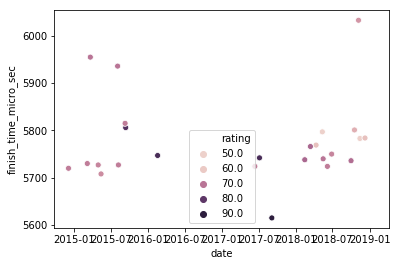

In [99]:

#display(races.finish_time)

races2 = races.merge(profiles, how="left", on="horse_id")
#display(races2)
dist_1000 = races2.query("dist == 1000 and horse_id == 'P429'")
display(dist_1000.date.dt.year.unique())
sns.scatterplot(dist_1000.date, dist_1000.loc[:, "finish_time_micro_sec"], hue=dist_1000.rating)
x1, x2, y1, y2 = plt.axis()
plt.axis((735500, 737156.6, y1, y2))

In [56]:
races.query("dist == 1000").groupby('horse_id').count().sort_values("race_index", ascending=False)

,race_index,race_index_url,pla,date,rc_track_course,dist,g,race_class,dr,rtg,...,gear_Pacifier_with_Cowls,gear_Shadow_Roll,gear_Sheepskin_Browband,gear_Sheepskn_Cheek_Pieces,gear_Sheepskin_Cheek_Piece_One_Side,gear_Tongue_Tie,gear_Visor,dist_per_sec,jockey_id,trainer_id
horse_id,,,,,,,,,,,,,,,,,,,,,
P310,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,45,36
T334,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,31,35
A008,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,19,29
P429,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
V385,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,19,23
T331,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,18,22
T010,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,17,21
N139,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,12,5
S397,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,16,19


array([2018, 2017, 2016, 2015, 2014, 2013])

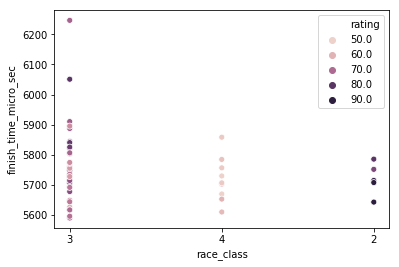

In [101]:

#display(races.finish_time)

races2 = races.merge(profiles, how="left", on="horse_id")
#display(races2)
dist_1000 = races2.query("dist == 1000 and horse_id == 'P310'")
display(dist_1000.date.dt.year.unique())
sns.scatterplot(dist_1000.race_class, dist_1000.finish_time_micro_sec, hue=dist_1000.rating)
#x1, x2, y1, y2 = plt.axis()
#plt.axis((735500, 737156.6, y1, y2))

355

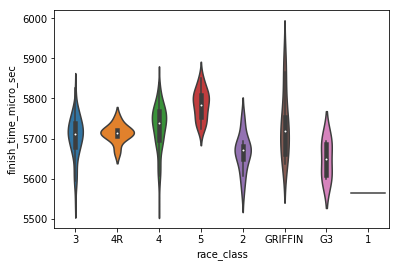

In [111]:
dist_1000 = races2.query("dist == 1000 and (pla == '01' or pla == '02' or pla == '03')")
display(dist_1000.race_class.count())
sns.violinplot(dist_1000.race_class, dist_1000.finish_time_micro_sec)

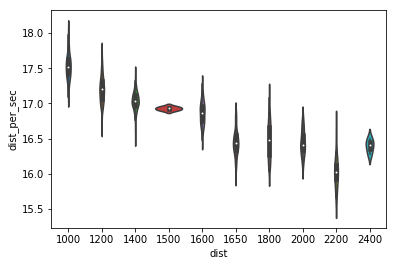

In [116]:
#dist_1000 = races2.query("dist == 1000 and (pla == '01' or pla == '02' or pla == '03')")
#display(dist_1000.race_class.count())
dists = races.query("pla == '01'")
sns.violinplot(dists.dist, dists.dist_per_sec) #dist_1000.race_class, dist_1000.finish_time_micro_sec)

In [132]:
display(races.rc_track_course.unique())

races.query("dist == 1200 and pla == '01'").groupby(["race_course", "race_course_2", "race_course_3"])['finish_time_micro_sec'].mean()

array(['ST / Turf / "A"', 'HV / Turf / "A"', 'ST / Turf / "C"',
       'HV / Turf / "C"', 'ST / Turf / "B"', 'ST / Turf / "B+2"',
       'HV / Turf / "C+3"', 'ST / Turf / "C+3"', 'ST / Turf / "A+3"',
       'HV / Turf / "B"', 'ST / AWT', 'Tokyo / Turf', 'Kranji / Turf',
       'Taipa / Turf'], dtype=object)

race_course  race_course_2  race_course_3
HV           Turf           "A"              7022.901639
                            "B"              7025.446429
                            "C"              7019.340909
                            "C+3"            7010.307692
ST           AWT                             6884.979592
             Turf           "A"              6953.340426
                            "A+3"            6944.318182
                            "B"              6948.520000
                            "B+2"            6957.875000
                            "C"              6945.703704
                            "C+3"            6953.080000
Name: finish_time_micro_sec, dtype: float64

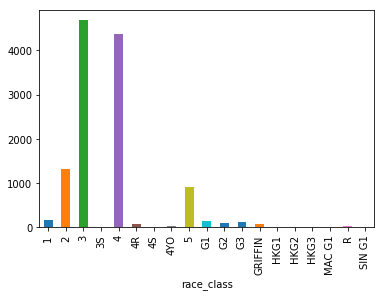

In [130]:
races.groupby("race_class")['pla'].count().plot("bar")

,race_index,race_index_url,pla,date,rc_track_course,dist,g,race_class,dr,rtg,...,gear_Pacifier_with_Cowls,gear_Shadow_Roll,gear_Sheepskin_Browband,gear_Sheepskn_Cheek_Pieces,gear_Sheepskin_Cheek_Piece_One_Side,gear_Tongue_Tie,gear_Visor,dist_per_sec,jockey_id,trainer_id
2080,002,https://racing.hkjc.com/racing/information/Eng...,04,2015-06-09,"ST / Turf / ""B""",1000,G,4,3,59,...,gear_off,gear_off,gear_off,gear_off,gear_off,gear_on,gear_off,17.639795,CAN,YPF
5559,002,https://racing.hkjc.com/racing/information/Eng...,05,2018-02-09,"ST / Turf / ""B""",1600,G,5,9,35,...,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,16.787326,LDE,GR
6165,002,https://racing.hkjc.com/racing/information/Eng...,01,2018-02-09,"ST / Turf / ""B""",1600,G,5,1,33,...,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,16.952744,WD,YTP
6177,002,https://racing.hkjc.com/racing/information/Eng...,07,2017-03-09,"ST / Turf / ""B""",1600,G,5,1,34,...,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,16.544308,YML,NaN
8166,002,https://racing.hkjc.com/racing/information/Eng...,06,2018-02-09,"ST / Turf / ""B""",1600,G,5,3,35,...,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,16.753927,TEK,HL
9718,002,https://racing.hkjc.com/racing/information/Eng...,12,2014-09-14,"ST / Turf / ""A""",1200,GF,5,4,39,...,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,16.802016,PZ,LKW
10251,002,https://racing.hkjc.com/racing/information/Eng...,02,2018-02-09,"ST / Turf / ""B""",1600,G,5,4,33,...,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,16.836788,PZ,YPF
10350,002,https://racing.hkjc.com/racing/information/Eng...,08,2018-02-09,"ST / Turf / ""B""",1600,G,5,8,34,...,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,16.691008,MCR,MA
10396,002,https://racing.hkjc.com/racing/information/Eng...,04,2017-03-09,"ST / Turf / ""B""",1600,G,5,4,33,...,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,16.573441,HCY,FC
11033,002,https://racing.hkjc.com/racing/information/Eng...,03,2018-02-09,"ST / Turf / ""B""",1600,G,5,2,32,...,gear_off,gear_off,gear_off,gear_off,gear_off,gear_off,removed,16.804957,RU,YCH


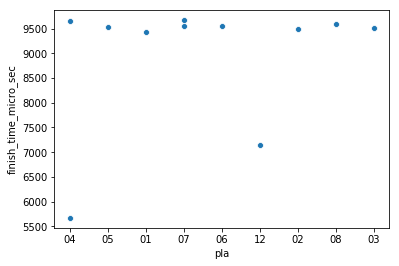

In [155]:
#races.groupby('race_index')['pla'].count()

df = races.query("race_index == '002'") #.loc[:, 'finish_time_micro_sec':]
display(df)
sns.scatterplot(y="finish_time_micro_sec", x="pla", data=df)

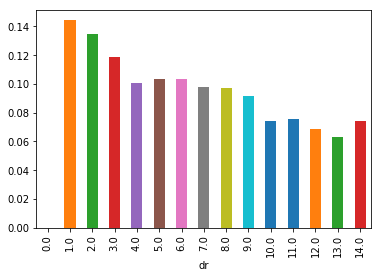

In [65]:
races['dr'] = pd.to_numeric(races["dr"], errors='coerce').fillna(0)
races.groupby("dr")['pla'].agg(lambda x: sum([1 for i in x if i == "01"])/len(x)).sort_index().plot("bar") #.count("01")/ len(x["pla"])

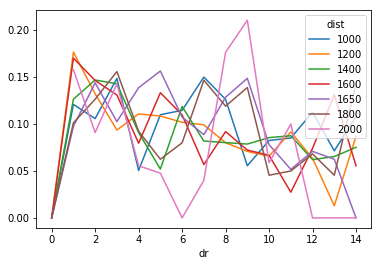

In [64]:
races.groupby(["dr", "dist"])["pla"].agg(lambda x: sum([1 for i in x if i == "01"])/len(x)).unstack(1).loc[:,[1000, 1200, 1400, 1600, 1650, 1800, 2000]].plot()

It's possible that certain tracks seems to have more draw advantage

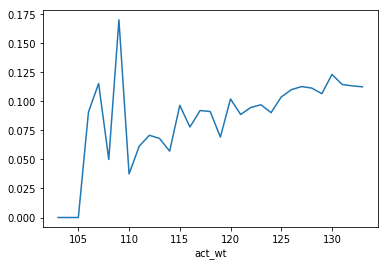

In [54]:
races.groupby("act_wt")['pla'].agg(lambda x: sum([1 for i in x if i == '01'])/len(x)).plot()

race_index and dr should be unique, but it's not. Something is wrong with either scraping or data aggregation.

In [66]:
races.columns

Index(['race_index', 'race_index_url', 'pla', 'date', 'rc_track_course',
       'dist', 'g', 'race_class', 'dr', 'rtg', 'trainer', 'trainer_url',
       'jockey', 'jockey_url', 'lbw', 'win_odds', 'act_wt', 'running_position',
       'finish_time', 'declare_horse_wt', 'gear', 'horse_id', 'race_course',
       'race_course_2', 'race_course_3', 'running_position_1',
       'running_position_2', 'running_position_3', 'running_position_4',
       'finish_time_micro_sec', 'rating', 'gear_Blinkers',
       'gear_Blinkers_Cowl', 'gear_Cornell_Collar', 'gear_Crossed_Nose_Band',
       'gear_Ear_Plugs', 'gear_Hood', 'gear_Pacifier',
       'gear_Pacifer_with_one_Cowl', 'gear_Pacifier_with_Cowls',
       'gear_Shadow_Roll', 'gear_Sheepskin_Browband',
       'gear_Sheepskn_Cheek_Pieces', 'gear_Sheepskin_Cheek_Piece_One_Side',
       'gear_Tongue_Tie', 'gear_Visor', 'dist_per_sec', 'jockey_id',
       'trainer_id'],
      dtype='object')

In [68]:
#pd.get_dummies(races['lbw'])
#races.groupby(["race_index", "dr"]).count()
#pd.get_dummies(races['gear_Blinkers_Cowl'], prefix='gear_Blinkers_Cowl')


# not include
#['race_index', 'race_index_url','rtg', 'trainer', 'jockey', 'jockey_url', 'running_position', 
#       'finish_time', 'gear', ]

#catagorical ['pla', 'rc_track_course', 'g','race_class', 'dist', 
#    'trainer_id', 'jockey_id', 'horse_id', 'race_course', 'race_course_2', 'race_course_3', 'gear_Blinkers',
#       'gear_Blinkers_Cowl', 'gear_Cornell_Collar', 'gear_Crossed_Nose_Band',
#       'gear_Ear_Plugs', 'gear_Hood', 'gear_Pacifier',
#       'gear_Pacifer_with_one_Cowl', 'gear_Pacifier_with_Cowls',
#       'gear_Shadow_Roll', 'gear_Sheepskin_Browband',
#       'gear_Sheepskn_Cheek_Pieces', 'gear_Sheepskin_Cheek_Piece_One_Side',
#       'gear_Tongue_Tie', 'gear_Visor']
#numerical
#[date','dr','rating', 'lbw', 'win_odds', 'act_wt', 'declare_horse_wt', 'running_position_1', 'running_position_2'
#'running_position_3' , 'running_position_4' # maybe use running_positon_4, nan is set to 0
# 'finish_time_micro_sec', 'dist_per_sec']

0        16.776513
1        17.226529
2        17.189514
3        16.259361
4        17.096452
5        17.258737
6        16.979988
7        17.108640
8        16.716418
9        17.155111
10       17.052721
11       17.391304
12       17.860332
13       17.485574
14       17.052721
15       17.157564
16       16.891892
17       16.865438
18       16.979988
19       17.348562
20       17.642908
21       16.963528
22       17.182131
23       16.861375
24       16.889514
25       16.977929
26       17.101325
27       17.108640
28       17.276130
29       17.194440
           ...    
11989    16.307571
11990    16.478989
11991    16.826165
11992    16.898008
11993    16.746411
11994    16.626832
11995    16.635475
11996    16.758439
11997    17.172295
11998    17.011625
11999    17.209236
12000    17.091582
12001    16.896649
12002    17.256255
12003    17.152659
12004    17.162471
12005    16.956337
12006    16.925247
12007    17.458101
12008    17.286085
12009    16.994760
12010    17.

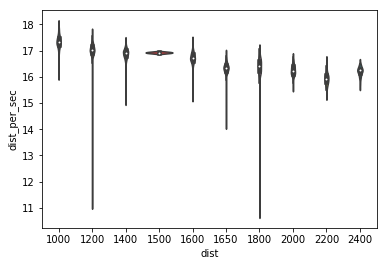

In [72]:
#races.groupby("dist")['dist_per_sec'].mean() #races['dist_per_sec']

sns.violinplot(x="dist", y="dist_per_sec", data=races)



In [80]:
#finding late finisher

%timeit -n 1 -r 1 races.groupby(["horse_id", 'dist'])['dist_per_sec'].mean().unstack(1)

7.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
